In [15]:
#強化学習   アームを選択　探索　確定　利用　バイアス　偶然による成功率のばらつきの大きさ 行動の試行回数が少ないときにでかくなる値
#パッケージのインポート 
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#スロットのアームの作成
"""
アームごとにコインが出る確率が決まっている 決められた回数で多くのあたりを引くにはどれが良いか
方策 行動 選んだアーム　環境:確率に従いコインを出す　報酬：コイン 方策と価値の合体:エージェント
この場合，情報収集のためにどのアームの報酬が高いかを調べる．しかしこればかりでは本当に報酬が高い時と比べて利益が下がる
例)決められた回数3回 0.3*0.5*0.1 <　0.5***3
利用ばかりすると他のアームに目がむかなくなり現時点より高い報酬が得られるアームを見落とす
"""
class SlotArm():
  #スロットのアームの初期化
  def __init__(self,p):
    self.p=p #コインが出る確率

  #アームを選択した時の報酬の取得
  def draw(self):
    if self.p>random.random():  #当たり
      return 1.0
    else:
      return 0.0  #外れ

In [17]:
#ε-greedyの計算処理の作成 0以上1以下の定数でランダムに行動を選択し，確率1-εで期待報酬が最大の行動を利用する手法
"""
εでランダムに行動を選択．そして1-εで報酬が最大の行動を選択するやり方
初めにアーム数を指定し，select_armで方策に従ってアームを選択する．その後，update()で試行回数と価値を更新
"""
class EpsilonGreedy():
  #ε-greedyの計算処理の初期化
  def __init__(self,epsilon):
    self.epsilon=epsilon #探索する確率

  #試行回数と価値のリセット
  def initialize(self,n_arms):
    self.n=np.zeros(n_arms) #各アームの試行回数
    self.v=np.zeros(n_arms) #各アームの価値

  #アームの選択 戻り値はアーム番号
  def select_arm(self):
    if self.epsilon>random.random():
      #ランダムにアームを選択
      return np.random.randint(0,len(self.v))
    else:
      #価値が高いアームを選択
      return np.argmax(self.v)

#アルゴリズムのパラメータの更新  tは全てのアームの試行回数の合計
  def update(self,chosen_arm,reward,t):
    #選択したアームの試行回数に１加算
    self.n[chosen_arm]+=1

    #選択したアームの価値の更新
    n=self.n[chosen_arm]
    v=self.v[chosen_arm]
    self.v[chosen_arm]=((n-1)/float(n)) * v+(1/float(n)) *reward

#文字列情報の取得  epsilonは探索する確率
  def label(self):
    return 'ε-greedy('+str(self.epsilon)+')'

In [21]:
"""UCB　成功率＋バイアスを最大化する行動を選択する手法 バイアスは偶然による成功率のばらつきの大きさ
選択したアームの試行回数に１を加算
成功時は選択したアームの成功回数に１を加算
試行回数が0のアームの存在時は価値を更新しない
各アームの価値の更新 全アームの価値が更新される
"""
class UCB1():
  #試行回数と成功回数と価値のリセット
  def initialize(self,n_arms):
    self.n=np.zeros(n_arms) #各アームの試行回数 n_armsはアーム数のこと
    self.w=np.zeros(n_arms) #各アームの成功回数
    self.v=np.zeros(n_arms) #各アームの価値
    #print("aaa")
  #アームの選択
  def select_arm(self):
    #nが全て１以上になるようにアームを選択
    for i in range(len(self.n)):
      if self.n[i]==0:
        return  i

    #価値が高いアームを選択
    return np.argmax(self.v)

  #アルゴリズムのパラメータの更新
  def update(self,chosen_arm,reward,t):
    #選択したアームの試行回数に１加算
    self.n[chosen_arm]+=1

    #成功時は選択したアームの成功回数に１加算
    if reward==1.0:
      self.w[chosen_arm]+=1

    #試行回数が０のアームの存在時は価値を更新しない
    for i in range(len(self.n)):
      if self.n[i]==0:
        return

    #各アームの価値の更新
    for i in range(len(self.v)):
      self.v[i]=self.w[i]/self.n[i] + (2*math.log(t) /self.n[i]) **0.5
    print("UCB1")
  
  
    #文字列情報の取得
  def label(self):
    return 'ucb1'

In [22]:
#シミュレーションの実行
def play(algo,arms,num_sims,num_time): #アルゴリズム群 アーム群 シミュレーション回数　決められたゲーム回数
  #履歴の準備
  times=np.zeros(num_sims*num_time) #ゲーム回数の何回目か テニスのゲーム数の数え方に近い
  rewards=np.zeros(num_sims*num_time) #報酬

  #シミュレーション回数分ループ
  for sim in range(num_sims):
    algo.initialize(len(arms)) #アルゴリズム設定の初期化

    #ゲーム回数分ループ
    for time in range(num_time):  #num_time=4
      #インデックスの計算
      index=sim*num_time+time
      #print(index)
      #履歴の計算
      times[index]=time+1

      chosen_arm=algo.select_arm()
      reward=arms[chosen_arm].draw()
      rewards[index]=reward

      #アルゴリズムのパラメータの更新
      algo.update(chosen_arm,reward,time+1)

  #[ゲーム回数の何回目か，報酬]
  return [times,rewards]

ストリーミング出力は最後の 5000 行に切り捨てられました。
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB1
UCB

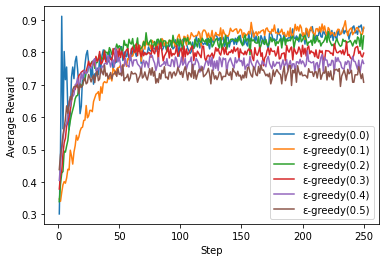

In [30]:
#アームの準備
arms=(SlotArm(0.3),SlotArm(0.5),SlotArm(0.9))
#アルゴリズムの準備
count=0
#epsilon_list=[0.0,0.1,0.2,0.3,0.4,0.5]
#algos=[EpsilonGreedy(epsilon) for epsilon  in epsilon_list ]
#algos1=(algos,UCB1())

for algo in algos:  #グラフから分かったことはεが大きいほど報酬が得られて早く良いコインが見つけられる
#しかしそのあとの探索が無駄になる
#εが小さいほど良いコインを見つけるのに時間がかかる
  #シミュレーションの実行
  
  if count==0:
    results=play(UCB1(), arms, 1000, 250)
  else:
    results=play(algo, arms, 1000, 250)
  
        
  #グラフの表示
  df=pd.DataFrame({'times': results[0],'rewards':results[1]})
  mean=df['rewards'].groupby(df['times']).mean()
  plt.plot(mean,label=algo.label())
  count+=1
 # print(count)

#グラフの表示
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc='best')
plt.show()